### Karan Vombatkere
CSC 440: Data Mining - Final Project

Below is an implementation of Python code on a dataset with detailed tennis match information from the ATP World Tour.
This notebook implements a logistic regression machine learning model on the data set

In [677]:
#Karan Vombatkere
#CSC 440: Data Mining Final Project
#November - Decemeber 2017

#Imports needed
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sbn

import itertools as itools
from statistics import *

import statsmodels.api as sm

#Sklearn imports for Logistic Regression
import sklearn
print(sklearn.__version__)
      
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV

#Imports for sklearn Neural Network
from sklearn.neural_network import MLPClassifier


0.19.0


In [678]:
#Imports for Neural Network libraries from keras
#from keras.models import Sequential
#from keras.layers import Dense, Activation
#from keras.wrappers.scikit_learn import KerasClassifier

In [679]:
#Import extracted features into dataframe
playerFeatures_0 = pd.read_csv("ATPPlayerFeatures.csv")

In [680]:
#View the dataset
playerFeatures_0

,PlayerID,PName,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/Match,DF/Match,Future Top 30
0,102776,Andrew Ilie,180.0,50,0.48,0.400000,0.357143,0.528531,0.706881,0.607748,0.362205,5.84,3.50,False
1,103602,Fernando Gonzalez,183.0,50,0.54,0.437500,0.444444,0.583274,0.714361,0.592025,0.442368,6.46,6.98,True
2,102821,Cecil Mamiit,173.0,50,0.38,0.285714,0.142857,0.563813,0.683618,0.610738,0.372283,3.98,2.80,False
3,103387,Paradorn Srichaphan,185.0,50,0.36,0.242424,0.142857,0.555230,0.703387,0.582245,0.387097,5.26,4.22,True
4,102925,Justin Gimelstob,196.0,50,0.40,0.346154,0.250000,0.570184,0.736796,0.571429,0.360119,7.18,4.88,False
5,103181,Jiri Vanek,185.0,50,0.38,0.281250,0.200000,0.548662,0.695444,0.592018,0.393701,6.04,2.90,False
6,102834,Paul Goldstein,178.0,50,0.44,0.333333,0.083333,0.620856,0.636147,0.576555,0.408163,2.36,2.18,False
7,103454,Nicolas Massu,183.0,50,0.48,0.352941,0.166667,0.550746,0.704383,0.565217,0.445255,4.44,3.00,True
8,103188,Michael Russell,173.0,50,0.26,0.166667,0.166667,0.682287,0.614960,0.544858,0.391781,2.40,3.12,False
9,102880,Alexander Popp,201.0,50,0.40,0.314286,0.200000,0.606751,0.672068,0.568182,0.417755,4.02,5.22,False


In [152]:
playerFeatures_0.columns

Index(['PlayerID', 'PName', 'Height(cm)', 'Matches Played', 'Overall Win%',
       'Top 100 Win %', 'Top 30 Win %', 'First Serve %', 'First Serve Win %',
       'BPSave %', 'BPConv %', 'Aces/Match', 'DF/Match', 'Future Top 30'],
      dtype='object')

In [153]:
#Compute Aces/DF Ration (per/match average)
#Rename the Aces Column and drop the DF Column
playerFeatures_0['Aces/Match'] = playerFeatures_0['Aces/Match']/playerFeatures_0['DF/Match']
playerFeatures_0 = playerFeatures_0.rename(columns={'Aces/Match': 'Aces/DF Ratio'})
del playerFeatures_0['DF/Match']

In [154]:
playerFeatures_0.head(20)

,PlayerID,PName,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/DF Ratio,Future Top 30
0,102776,Andrew Ilie,180.0,50,0.48,0.400000,0.357143,0.528531,0.706881,0.607748,0.362205,1.668571,False
1,103602,Fernando Gonzalez,183.0,50,0.54,0.437500,0.444444,0.583274,0.714361,0.592025,0.442368,0.925501,True
2,102821,Cecil Mamiit,173.0,50,0.38,0.285714,0.142857,0.563813,0.683618,0.610738,0.372283,1.421429,False
3,103387,Paradorn Srichaphan,185.0,50,0.36,0.242424,0.142857,0.555230,0.703387,0.582245,0.387097,1.246445,True
4,102925,Justin Gimelstob,196.0,50,0.40,0.346154,0.250000,0.570184,0.736796,0.571429,0.360119,1.471311,False
5,103181,Jiri Vanek,185.0,50,0.38,0.281250,0.200000,0.548662,0.695444,0.592018,0.393701,2.082759,False
6,102834,Paul Goldstein,178.0,50,0.44,0.333333,0.083333,0.620856,0.636147,0.576555,0.408163,1.082569,False
7,103454,Nicolas Massu,183.0,50,0.48,0.352941,0.166667,0.550746,0.704383,0.565217,0.445255,1.480000,True
8,103188,Michael Russell,173.0,50,0.26,0.166667,0.166667,0.682287,0.614960,0.544858,0.391781,0.769231,False
9,102880,Alexander Popp,201.0,50,0.40,0.314286,0.200000,0.606751,0.672068,0.568182,0.417755,0.770115,False


In [155]:
#Code to Normalize the values of the (Height, Aces and DF) columns so they can be used in the Logistic Regression model
#We perform min-max normalization in the [0,1] range
#Function takes the data frame and list of columns to normalize as inputs
#Returns a dataframe with the specified columns normalized

def normalizeFeatures(df, col_list):
    normedDF = df.copy()
    for featureName in col_list:
        maxA = df[featureName].max()
        minA = df[featureName].min()
        normedDF[featureName] = (df[featureName] - minA)/(maxA - minA)
        
    return normedDF

In [156]:
normalizeCols = ['Height(cm)', 'Overall Win%','Top 100 Win %', 'Top 30 Win %', 'First Serve %', 'First Serve Win %','BPSave %', 'BPConv %', 'Aces/DF Ratio']
playerFeatures = normalizeFeatures(playerFeatures_0, normalizeCols)

In [157]:
playerFeatures.head(50)

,PlayerID,PName,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/DF Ratio,Future Top 30
0,102776,Andrew Ilie,0.377778,50,0.448276,0.417436,0.412088,0.196590,0.470153,0.486882,0.462373,0.262648,False
1,103602,Fernando Gonzalez,0.444444,50,0.551724,0.474359,0.512821,0.406696,0.508411,0.411946,0.778880,0.120840,True
2,102821,Cecil Mamiit,0.222222,50,0.275862,0.243956,0.164835,0.332004,0.351170,0.501132,0.502163,0.215483,False
3,103387,Paradorn Srichaphan,0.488889,50,0.241379,0.178244,0.164835,0.299060,0.452279,0.365341,0.560654,0.182089,True
4,102925,Justin Gimelstob,0.733333,50,0.310345,0.335700,0.288462,0.356454,0.623158,0.313790,0.454138,0.225003,False
5,103181,Jiri Vanek,0.488889,50,0.275862,0.237179,0.230769,0.273854,0.411654,0.411913,0.586729,0.341692,False
6,102834,Paul Goldstein,0.333333,50,0.379310,0.316239,0.096154,0.550936,0.108368,0.338221,0.643831,0.150815,False
7,103454,Nicolas Massu,0.444444,50,0.448276,0.346003,0.192308,0.281850,0.457376,0.284188,0.790282,0.226661,True
8,103188,Michael Russell,0.222222,50,0.068966,0.063248,0.192308,0.786712,0.000000,0.187159,0.579148,0.091017,False
9,102880,Alexander Popp,0.844444,50,0.310345,0.287326,0.230769,0.496801,0.292095,0.298316,0.681700,0.091185,False


True     129
False    120
Name: Future Top 30, dtype: int64


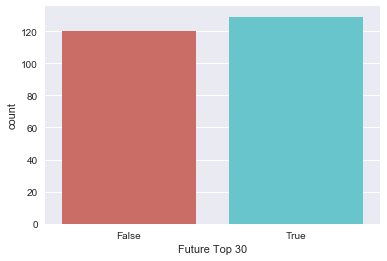

In [158]:
#Some preliminary data exploration

#Get an idea of the counts of True and False values
print(playerFeatures['Future Top 30'].value_counts())

sbn.countplot(x='Future Top 30', data=playerFeatures, palette = 'hls')

In [159]:
#Examine statistics of the attributes
playerFeatures.describe()

,PlayerID,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/DF Ratio
count,249.000000,249.000000,249.0,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,104075.867470,0.497010,50.0,0.404515,0.414285,0.319280,0.437995,0.445335,0.424376,0.585898,0.287556
std,966.105915,0.154152,0.0,0.175814,0.183980,0.167996,0.167574,0.208435,0.179843,0.152001,0.172552
min,102318.000000,0.000000,50.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103285.000000,0.377778,50.0,0.275862,0.287326,0.192308,0.328547,0.294087,0.303678,0.502518,0.163510
50%,104026.000000,0.488889,50.0,0.379310,0.408236,0.307692,0.429851,0.432769,0.411913,0.580014,0.256735
75%,104813.000000,0.600000,50.0,0.482759,0.531282,0.432692,0.537060,0.586567,0.525141,0.691033,0.377946
max,106432.000000,1.000000,50.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
playerFeatures.groupby('Future Top 30').mean()

,PlayerID,Height(cm),Matches Played,Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/DF Ratio
Future Top 30,,,,,,,,,,,
False,104191.216667,0.472222,50.0,0.304023,0.311789,0.235375,0.463182,0.367368,0.382895,0.555198,0.265372
True,103968.565891,0.520069,50.0,0.497995,0.509630,0.397330,0.414564,0.517861,0.462964,0.614457,0.308191


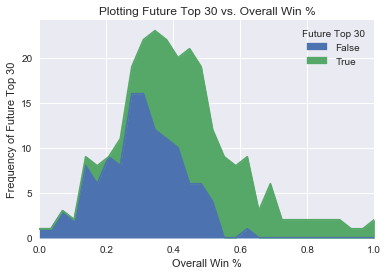

In [161]:
#Examine preliminary relationships to estimate good predictors/features 
#Overall win %
pd.crosstab(playerFeatures['Overall Win%'], playerFeatures['Future Top 30']).plot(kind='area')
plt.title("Plotting Future Top 30 vs. Overall Win %")
plt.xlabel('Overall Win %')
plt.ylabel('Frequency of Future Top 30')

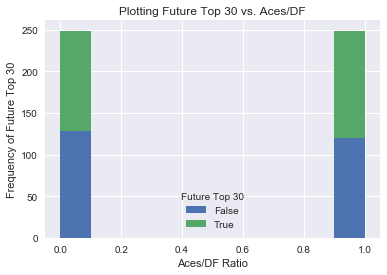

In [162]:
#Examine preliminary relationships to estimate good predictors/features 
#Aces/Match win %
pd.crosstab(playerFeatures['Aces/DF Ratio'], playerFeatures['Future Top 30']).plot(kind='hist', stacked = True)
plt.title("Plotting Future Top 30 vs. Aces/DF")
plt.xlabel('Aces/DF Ratio')
plt.ylabel('Frequency of Future Top 30')

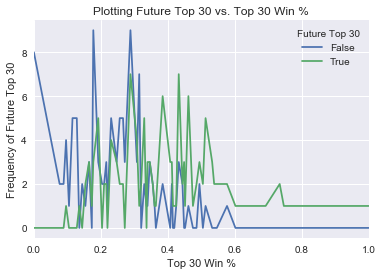

In [163]:
#Examine preliminary relationships to estimate good predictors/features 
#Overall win %
pd.crosstab(playerFeatures['Top 30 Win %'], playerFeatures['Future Top 30']).plot()
plt.title("Plotting Future Top 30 vs. Top 30 Win %")
plt.xlabel('Top 30 Win %')
plt.ylabel('Frequency of Future Top 30')

In [164]:
#Define the training data set and test data
notReqFeatures = ['PlayerID', 'PName', 'Matches Played'] #Columns names not needed in algorithm

#Specify the classification variable
yTarget = 'Future Top 30'

#Specify the features in the input vector
X_init = [i for i in playerFeatures if (i not in yTarget and i not in notReqFeatures)]

In [165]:
playerFeatures[X_init].head()

,Height(cm),Overall Win%,Top 100 Win %,Top 30 Win %,First Serve %,First Serve Win %,BPSave %,BPConv %,Aces/DF Ratio
0,0.377778,0.448276,0.417436,0.412088,0.196590,0.470153,0.486882,0.462373,0.262648
1,0.444444,0.551724,0.474359,0.512821,0.406696,0.508411,0.411946,0.778880,0.120840
2,0.222222,0.275862,0.243956,0.164835,0.332004,0.351170,0.501132,0.502163,0.215483
3,0.488889,0.241379,0.178244,0.164835,0.299060,0.452279,0.365341,0.560654,0.182089
4,0.733333,0.310345,0.335700,0.288462,0.356454,0.623158,0.313790,0.454138,0.225003


## Logistic Regression Model
This section creates a logistic regression model and performs Feature Selection, trains the model and then performs k-fold stratified cross validation

In [601]:
#Set up the Logistic Regression Classifier
logregClf = LogisticRegression(C=0.1, solver='liblinear')
print(logregClf)


#Perform Recursive Feature Elimination to determine the best features to be chosen in the model
#We do this to see if there are any features we should reject on the outset
for i in range(8):
    rfe = RFE(estimator=logregClf, n_features_to_select = i+1)
    rfe = rfe.fit(playerFeatures[X_init], playerFeatures[yTarget])
    print("==================================================================================================")
    print("Performing Recursive Feature Elimination to Select", i+1, "best Features:")
    bestFeatures = []
    for i, val in enumerate(rfe.support_):
        if(val): #Print out the Selected Features
            bestFeatures.append(X_init[i])
    
    print(bestFeatures)
            
    print(rfe.ranking_)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Performing Recursive Feature Elimination to Select 1 best Features:
['Top 100 Win %']
[7 2 1 3 4 5 6 9 8]
Performing Recursive Feature Elimination to Select 2 best Features:
['Overall Win%', 'Top 100 Win %']
[6 1 1 2 3 4 5 8 7]
Performing Recursive Feature Elimination to Select 3 best Features:
['Overall Win%', 'Top 100 Win %', 'Top 30 Win %']
[5 1 1 1 2 3 4 7 6]
Performing Recursive Feature Elimination to Select 4 best Features:
['Overall Win%', 'Top 100 Win %', 'Top 30 Win %', 'First Serve %']
[4 1 1 1 1 2 3 6 5]
Performing Recursive Feature Elimination to Select 5 best Features:
['Overall Win%', 'Top 100 Win %', 'Top 30 Win %', 'First Serve %', 'First Serve Win %']
[3 1 1 1 1 1 2 5 4]
Performing Recursive Feature Eliminati

In [602]:
#Determine final set of features for Logistic Regression Model
#Select final list of features based on the RFE output
X_finalcols = ['Overall Win%', 'Top 100 Win %', 'Top 30 Win %','First Serve %','First Serve Win %','BPSave %','Aces/DF Ratio']

X = playerFeatures[X_finalcols]
Y = playerFeatures[yTarget]

In [603]:
logit_model=sm.Logit(Y,X)

result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.530556
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Future Top 30   No. Observations:                  249
Model:                          Logit   Df Residuals:                      242
Method:                           MLE   Df Model:                            6
Date:                Thu, 14 Dec 2017   Pseudo R-squ.:                  0.2338
Time:                        01:53:26   Log-Likelihood:                -132.11
converged:                       True   LL-Null:                       -172.43
                                        LLR p-value:                 2.629e-15
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Overall Win%          4.0642      2.384      1.704      0.088      -0.609       8.738
Top 100 

In [604]:
#Perform Grid Searching on the Logistic Regression Model to tune Hyperparameters
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

#Define dictionary of tuning parameters
tune_parameters = [{'C':[10, 1, 0.1, 0.001, 0.0001], 'solver':['newton-cg','lbfgs','liblinear','sag','saga']}]

#Initialize Grid Search
clf = GridSearchCV(LogisticRegression(max_iter=1000), tune_parameters, cv=5, scoring = 'accuracy')
clf.fit(X_train, y_train)

print("Performing Grid Search ...")
print("Best parameters set found on tuning parameter set:\n")
print(clf.best_params_)

Performing Grid Search ...
Best parameters set found on tuning parameter set:

{'C': 10, 'solver': 'newton-cg'}


In [671]:
#Run the Logistic regression model with randomly selected test and training data - with cross validation
#Function to perform logistic regression, given the input vector and target values of a data set
#Inputs - xVec is the input feature vector and y is the target class label
#Output - Perform Logistic Regression and return accuracy + Validation results

def LogRegression(xVec, y, testSize):
    start = time.time() #compute the start time

    #Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(xVec, y,test_size = testSize)
    
    #Train the model using the training data set
    logregClf.fit(X_train, y_train)

    #Score on test set generated
    #Predict for the Test Set and return Accuracy
    y_pred = logregClf.predict(X_test)
    
    print("++++++++++++++++++++++++++++++++++++LOGISTIC REGRESSION CLASSIFIER++++++++++++++++++++++++++++++++++++++++++++")
    print("Number of Training Samples =", len(X_train))
    print("Number of Test Samples =", len(X_test))
    print("\nTraining model with", ((1-testSize)*100),"% of data and testing with", (testSize*100),"% of the data")
    print("Prediction Accuracy on Test Set =", logregClf.score(X_test,y_test))

    
    #Print Detailed Classification results
    print("\nFull Classification Report:")
    print(classification_report(y_test, y_pred))
    
    #Compute ROC parameters - TPR, FPR
    logit_roc_auc = roc_auc_score(y_test, logregClf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logregClf.predict_proba(X_test)[:,1])
    
    logitROC = plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic Curve for Logistic Regression Model')
    plt.legend(loc="lower right")
    
    #Perform stratified k-fold cross validation
    #Split the data set into 5 folds ~50 players in each fold
    numFolds = 5
    Skfold = model_selection.StratifiedKFold(n_splits = numFolds, shuffle = True, random_state=np.random.randint(100))
    
    modelCV = LogisticRegression()
    scoring = ['accuracy','precision','recall']
    
    #Apply cross validation for each of the evaluation three parameters
    print("\nPerforming Stratified k-fold Cross Validation")
    
    for i, metric in enumerate(scoring):
        print("=============================================================================================")
        results = model_selection.cross_val_score(modelCV, xVec, y, cv=Skfold, scoring=metric)
        print(numFolds,"-fold cross validation average", metric,": %.3f" % (results.mean()))
        print("Best case", metric, ": %.3f" % (results.max()))
        print(results)
    

    #compute runtime
    end = time.time()
    runTime = end - start
    
    print("\nLogistic Regression Classifier Runtime =", runTime, 'seconds')
    
    #for i, val in enumerate(y_pred):
        #if(val[1] > 0.5):
           #print("Player is likely to be a top 30 player with a probability:", val[1])
            
    #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregClf.score(X_test, y_test)))
    
    return None

++++++++++++++++++++++++++++++++++++LOGISTIC REGRESSION CLASSIFIER++++++++++++++++++++++++++++++++++++++++++++
Number of Training Samples = 174
Number of Test Samples = 75

Training model with 70.0 % of data and testing with 30.0 % of the data
Prediction Accuracy on Test Set = 0.733333333333

Full Classification Report:
             precision    recall  f1-score   support

      False       1.00      0.46      0.63        37
       True       0.66      1.00      0.79        38

avg / total       0.83      0.73      0.71        75


Performing Stratified k-fold Cross Validation
5 -fold cross validation average accuracy : 0.755
Best case accuracy : 0.860
[ 0.68        0.78        0.76        0.86        0.69387755]
5 -fold cross validation average precision : 0.761
Best case precision : 0.852
[ 0.67857143  0.72727273  0.81818182  0.85185185  0.72727273]
5 -fold cross validation average recall : 0.774
Best case recall : 0.923
[ 0.73076923  0.92307692  0.69230769  0.88461538  0.64      ]



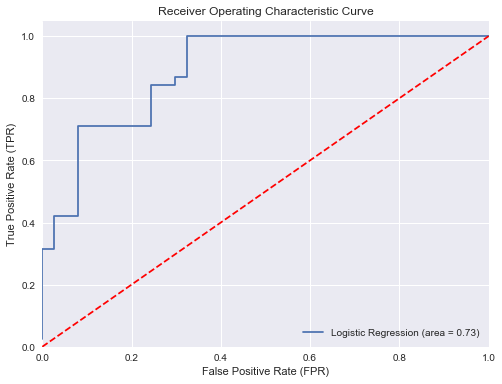

In [672]:
#Run the Logistic Regression Model
LogRegression(X, Y, 0.3)

In [647]:
logregClf.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Neural Network Model
This section creates a Neural Network with one hidden layer and performs Feature Selection, trains the model and then performs k-fold stratified cross validation

In [582]:
#Set up the Neural Network
#We use 16 neurons in the hidden layer and stochastic gradient descent for our solver 
mlpNet = MLPClassifier(hidden_layer_sizes=(64, ), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=5000)
print(mlpNet)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [583]:
#Determine final set of features for Neural Network Model
#Select final list of features based on the RFE output
X_nncols = ['Overall Win%','Top 100 Win %','Top 30 Win %','First Serve Win %','BPSave %', 'BPConv %', 'Aces/DF Ratio']

X_nn = playerFeatures[X_nncols]
Y = playerFeatures[yTarget]

In [561]:
#Perform Grid Searching on the Neural Network to tune Hyperparameters
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X_nn, Y, test_size=0.4)

#Define dictionary of tuning parameters
#tune_parameters = [{'hidden_layer_sizes':[10,30,50], 'learning_rate_init':[0.1,0.01,0.001,0.0001]}]
tune_parameters = [{'activation':['relu','logistic','tanh'], 'learning_rate_init':[0.1,0.01,0.001,0.0001], 
                   'solver':['lbfgs','sgd', 'adam']}]

#Initialize Grid Search
clf = GridSearchCV(MLPClassifier(hidden_layer_sizes=(32, ), max_iter=5000), tune_parameters, cv=5, scoring = 'accuracy')
clf.fit(X_train, y_train)

print("Performing Grid Search ...")
print("Best parameters set found on tuning parameter set:\n")
print(clf.best_params_)

Performing Grid Search ...
Best parameters set found on tuning parameter set:

{'activation': 'tanh', 'learning_rate_init': 0.01, 'solver': 'sgd'}


In [675]:
#Define the Neural Network Model using sklearn MLPClassifier

def classificationNetwork(xVec, y, testSize):
    start = time.time() #compute the start time
    
    #Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(xVec, y, test_size = testSize)
    
    #Train the model
    mlpNet.fit(X_train, y_train) 
    
    #Score on test set generated
    #Predict for the Test Set and return Accuracy
    y_pred = mlpNet.predict(X_test)
    
    print("++++++++++++++++++++++++++++++++++++NEURAL NETWORK CLASSIFIER++++++++++++++++++++++++++++++++++++++++++++")
    print("Number of Training Samples =", len(X_train))
    print("Number of Test Samples =", len(X_test))
    print("\nTraining model with", ((1-testSize)*100),"% of data and testing with", (testSize*100),"% of the data")
    print("Prediction Accuracy on Test Set =", mlpNet.score(X_test,y_test))

    #Print Detailed Classification results
    print("\nFull Classification Report:")
    print(classification_report(y_test, y_pred))
    
    #Compute ROC parameters - TPR, FPR
    NN_roc_auc = roc_auc_score(y_test, mlpNet.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, mlpNet.predict_proba(X_test)[:,1])
    
    logitROC = plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % NN_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic Curve for Neural Network Model')
    plt.legend(loc="lower right")
    
    #Perform stratified k-fold cross validation
    #Split the data set into 5 folds ~50 players in each fold
    numFolds = 5
    Skfold = model_selection.StratifiedKFold(n_splits = numFolds, shuffle = True, random_state=np.random.randint(100))
    
    scoring = ['accuracy','precision','recall']
    
    #Apply cross validation for each of the evaluation three parameters
    print("\nPerforming Stratified k-fold Cross Validation...")
    
    for i, metric in enumerate(scoring):
        print("=============================================================================================")
        results = model_selection.cross_val_score(mlpNet, xVec, y, cv=Skfold, scoring=metric)
        print(numFolds,"-fold cross validation average", metric,": %.3f" % (results.mean()))
        print("Best case", metric, ": %.3f" % (results.max()))
        print(results)
    
    #compute runtime
    end = time.time()
    runTime = end - start
    print("\nNeural Network Classifier Runtime =", runTime, 'seconds')
    print("=============================================================================================")

    return None

++++++++++++++++++++++++++++++++++++NEURAL NETWORK CLASSIFIER++++++++++++++++++++++++++++++++++++++++++++
Number of Training Samples = 174
Number of Test Samples = 75

Training model with 70.0 % of data and testing with 30.0 % of the data
Prediction Accuracy on Test Set = 0.773333333333

Full Classification Report:
             precision    recall  f1-score   support

      False       0.74      0.80      0.77        35
       True       0.81      0.75      0.78        40

avg / total       0.78      0.77      0.77        75


Performing Stratified k-fold Cross Validation...
5 -fold cross validation average accuracy : 0.763
Best case accuracy : 0.840
[ 0.84        0.78        0.76        0.76        0.67346939]
5 -fold cross validation average precision : 0.785
Best case precision : 0.900
[ 0.8         0.80769231  0.75        0.9         0.66666667]
5 -fold cross validation average recall : 0.790
Best case recall : 0.923
[ 0.92307692  0.84615385  0.84615385  0.57692308  0.76      ]

Ne

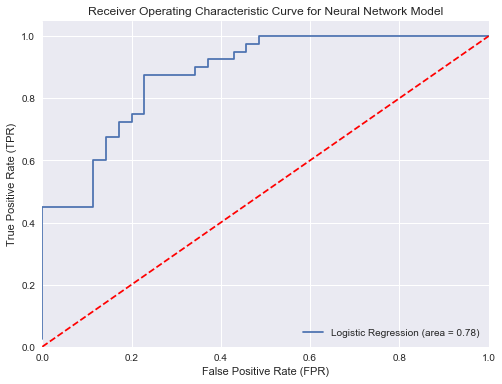

In [676]:
#Run the Neural Network Classifier
classificationNetwork(X_nn, Y, 0.3)

In [ ]:
#Define the Neural Network Model in Keras
def create_NN():
    #Compute the dimension of the input feature vector xVec
    #This is just the length of columns list in the dataframe
    inputSize = len(X.columns)
    
    #Construct NN model
    NNmodel = Sequential()
    
    #start from the first hidden layer, since the input is not actually a layer     
    NNmodel.add(Dense(12, input_dim = inputSize, activation='relu'))

    #Output layer
    NNmodel.add(Dense(1, activation='sigmoid'))
    
    #Compile the Neural Network
    NNmodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    #Display model summary
    NNmodel.summary()
    
    return NNmodel
    

In [ ]:
#Build the Neural Network Classifier and perform Validation and Evaluation
#Keras Version
def NeuralNet(xVec, y, testSize):
    start = time.time() #compute the start time

    networkModel = KerasClassifier(build_fn=create_NN, epochs=100, verbose=0)
    print(networkModel.get_params())
    
    #Perform stratified k-fold cross validation
    #Split the data set into 5 folds ~50 players in each fold
    numFolds = 5
    Skfold = model_selection.StratifiedKFold(n_splits = numFolds, shuffle = True, random_state=np.random.randint(100))
    
    #Split the data into training and test sets and train the model
    X_train, X_test, y_train, y_test = train_test_split(xVec, y, test_size = testSize, random_state=np.random.randint(100))
    
    #Train the model
    #networkModel.fit()
    
    #Evaluate the results of Validation
    results = model_selection.cross_val_score(networkModel, xVec.values, y.values, cv=Skfold)
    print(numFolds, "-fold cross validation average accuracy: %.3f" % (results.mean()))
    print(results)
    
    #compute runtime
    end = time.time()
    runTime = end - start
    print("Neural Network Classifier Runtime =", runTime, 'seconds')


In [ ]:
NeuralNet(X, Y, 0.3)